# Data Analysis
## Overview

In this notebook, we will look at overall trend and descriptive stats, such as what is the most popular films or the most profitable films, the proportion of MPAA, etc., without further diving into the relationship.

In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [515]:
#loading data
df = pd.read_csv('data/profit_data.csv', index_col = 0)
df.head(3)

,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,...,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers
0,31.998,2653,189,False,en,sin city: a dame to kill for,6.3,Some of Sin City's most hard-boiled citizens c...,R,2014,...,2014,102.0,"Crime,Thriller",6.5,140666,"Josh Brolin,Mickey Rourke,Jessica Alba,Joseph ...","Frank Miller,Robert Rodriguez","Mark C. Manuel,Sergei Bespalov,Aaron Kaufman,S...",NaN,NaN
1,14.736,15131,1771,False,en,captain america: the first avenger,6.9,"During World War II, Steve Rogers is a sickly ...",PG-13,2011,...,2011,124.0,"Action,Adventure,Sci-Fi",6.9,668137,"Chris Evans,Samuel L. Jackson,Hugo Weaving,Hay...",Joe Johnston,Kevin Feige,NaN,"Jack Kirby,Christopher Markus,Stephen McFeely,..."
2,24.337,10020,1865,False,en,pirates of the caribbean: on stranger tides,6.5,Captain Jack Sparrow crosses paths with a woma...,PG-13,2011,...,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,"Johnny Depp,Geoffrey Rush,Ian McShane,Penélope...",Rob Marshall,NaN,NaN,"Stuart Beattie,Ted Elliott,Terry Rossio,Tim Po..."


In [516]:
df.columns

Index(['popularity', 'vote_count', 'id_x', 'adult', 'original_language',
       'title', 'vote_average', 'overview', 'MPAA', 'year', 'month', 'studio',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'tconst',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'avg_rating_imdb', 'num_votes_imdb', 'actors', 'directors',
       'producers', 'editors', 'writers'],
      dtype='object')

## Overall 

### Number of films 

In [517]:
print(f"We currently have {len(df)} values in our dataset")

We currently have 1217 values in our dataset


In [518]:
print(f"Out of which {df.title.nunique()} films with unique name")

Out of which 1192 films with unique name


In [519]:
df.isnull().sum()

popularity              0
vote_count              0
id_x                    0
adult                   0
original_language       0
title                   0
vote_average            0
overview                0
MPAA                  135
year                    0
month                   0
studio                200
production_budget       0
domestic_gross          0
worldwide_gross         0
tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes         4
genres                  2
avg_rating_imdb         0
num_votes_imdb          0
actors                  9
directors              36
producers             142
editors              1067
writers               182
dtype: int64

In [520]:
df.describe()

,popularity,vote_count,id_x,vote_average,year,month,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,avg_rating_imdb,num_votes_imdb
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1213.000000,1217.000000,1.217000e+03
mean,18.049621,3069.410025,196394.838948,6.413394,2013.974528,6.687757,53.198233,69.065933,171.866220,2013.974528,109.303380,6.434511,1.395964e+05
std,8.194391,3540.654898,142886.092615,0.762091,2.668994,3.401981,58.524003,88.881953,246.946819,2.668994,17.129827,0.940732,1.720681e+05
min,5.590000,23.000000,189.000000,4.100000,2010.000000,1.000000,0.070000,0.000000,0.000000,2010.000000,25.000000,1.600000,5.000000e+00
25%,12.369000,827.000000,62215.000000,5.900000,2012.000000,4.000000,13.000000,16.010000,29.200000,2012.000000,97.000000,5.900000,3.490700e+04
50%,15.890000,1785.000000,159824.000000,6.400000,2014.000000,7.000000,30.000000,39.440000,78.670000,2014.000000,107.000000,6.500000,8.320000e+04
75%,21.490000,4016.000000,315664.000000,6.900000,2016.000000,10.000000,69.000000,84.270000,204.770000,2016.000000,119.000000,7.100000,1.764690e+05
max,101.014000,26369.000000,532671.000000,8.400000,2019.000000,12.000000,410.600000,700.060000,2048.130000,2019.000000,180.000000,8.800000,1.841066e+06


### MPAA Distribution

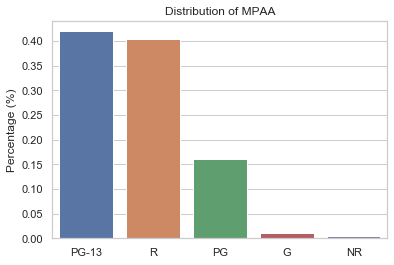

In [521]:
Y = df.MPAA.value_counts(normalize = True)
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of MPAA")
plt.ylabel("Percentage (%)")
plt.show()

### Studio Distribution 

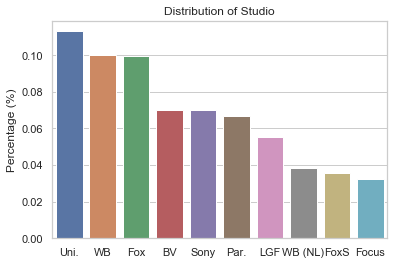

In [522]:
Y = df.studio.value_counts(normalize = True)[0:10]
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of Studio")
plt.ylabel("Percentage (%)")
plt.show()

### Original Language distribution

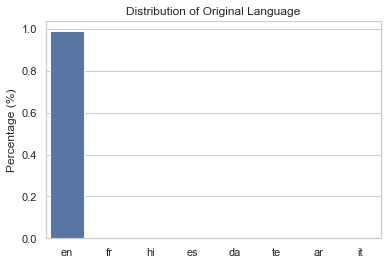

In [524]:
Y = df.original_language.value_counts(normalize = True)[0:10]
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of Original Language")
plt.ylabel("Percentage (%)")
plt.show()

### Budget Distribution

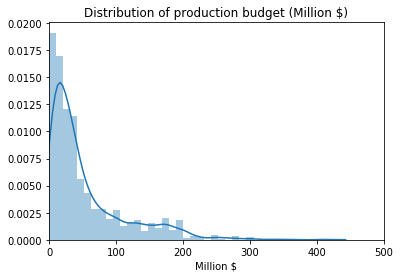

In [149]:
Y = df.production_budget.sort_values()

sns.distplot(Y)
plt.title("Distribution of production budget (Million $)")
plt.xlabel("Million $")
plt.xlim([0, 500])
plt.show()

### Gross Distribution (domestic, worldwide)

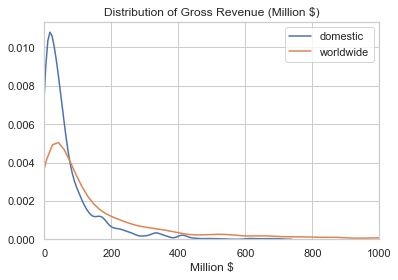

In [525]:
Y = df.domestic_gross.sort_values()
Z = df.worldwide_gross.sort_values()
sns.distplot(Y, label = 'domestic', hist = False)
sns.distplot(Z, label = 'worldwide', hist = False)

plt.title("Distribution of Gross Revenue (Million $)")
plt.legend()
plt.xlabel("Million $")
plt.xlim([0, 1000])
plt.show()

### Budget to Gross Domestic

In [526]:
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_int'] = df.worldwide_gross/df.production_budget

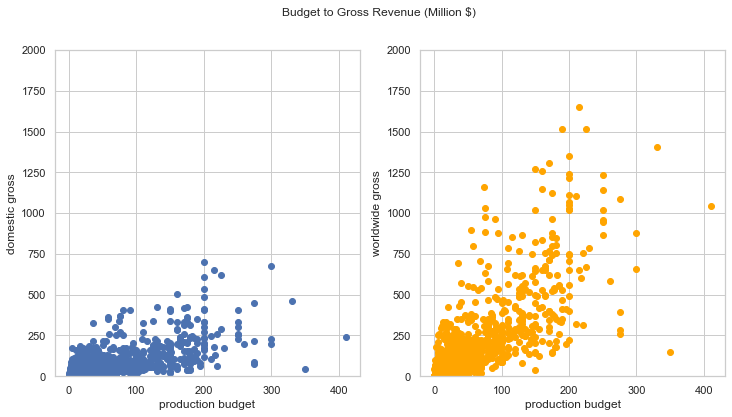

In [527]:
tmp = df[['production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')
X = tmp['production_budget']
Y = tmp['domestic_gross']
Z = tmp['worldwide_gross']

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X, Y)
ax2.scatter(X, Z, c = 'orange')

fig.suptitle("Budget to Gross Revenue (Million $)")
ax1.set_ylabel("domestic gross")
ax2.set_ylabel("worldwide gross")
ax1.set_xlabel("production budget")
ax2.set_xlabel("production budget")
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])


plt.show()


### Budget to Gross Revenue Per Genres (Million $)

In [528]:
tmp = df[['primary_genre', "rev2bud_dom", "rev2bud_int", \
          'production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')


plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "production_budget", y = "domestic_gross", hue = "primary_genre", \
                     size = "rev2bud_dom", sizes = (50, 200), data = tmp, alpha = 0.8)


ax1.set_ylabel("domestic gross")
ax1.set_xlabel("production budget")
ax1.set_title("Domestic Gross Revenue per Production Budget")


plt.show()

KeyError: "['primary_genre'] not in index"

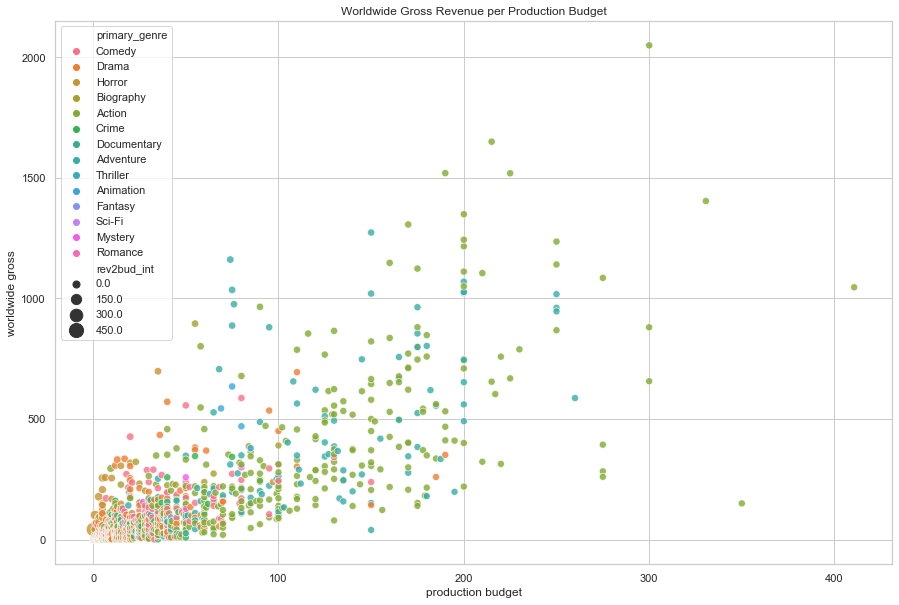

In [329]:
tmp = df[['primary_genre', "rev2bud_dom", "rev2bud_int", \
          'production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')


plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "production_budget", y = "worldwide_gross", hue = "primary_genre", \
                     size = "rev2bud_int", sizes = (50, 200), data = tmp, alpha = 0.8)


ax1.set_ylabel("worldwide gross")
ax1.set_xlabel("production budget")
ax1.set_title("Worldwide Gross Revenue per Production Budget")

plt.show()

### Average Runtimes

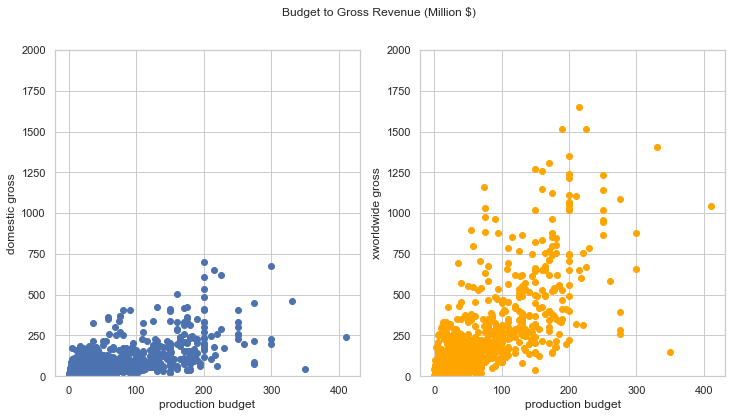

In [529]:
tmp = df[['production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')
X = tmp['production_budget']
Y = tmp['domestic_gross']
Z = tmp['worldwide_gross']

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X, Y)
ax2.scatter(X, Z, c = 'orange')

fig.suptitle("Budget to Gross Revenue (Million $)")
ax1.set_ylabel("domestic gross")
ax2.set_ylabel("xworldwide gross")
ax1.set_xlabel("production budget")
ax2.set_xlabel("production budget")
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])


plt.show()


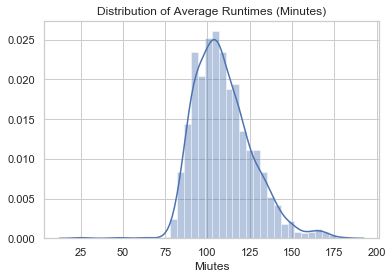

In [530]:
Y = df.runtime_minutes.dropna().sort_values()

sns.distplot(Y)

plt.title("Distribution of Average Runtimes (Minutes)")
plt.xlabel("Miutes")
plt.show()

### Genres Distribution

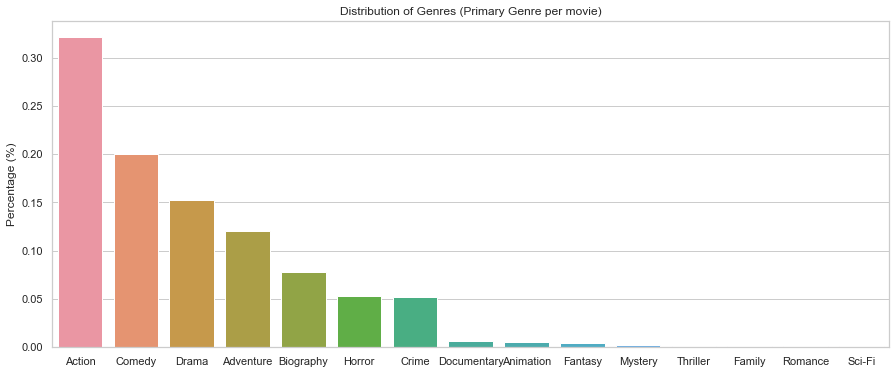

In [531]:
df['primary_genre'] = df.genres.str.split(',', n = 1, expand = True)[0]

Y = df['primary_genre'].value_counts(normalize = True)
X = Y.index
top6 = X[0:6]

fig = plt.figure(figsize = (15, 6))
sns.barplot(X, Y)
plt.title("Distribution of Genres (Primary Genre per movie)")
plt.ylabel("Percentage (%)")
plt.show()


## Popularity

### What are the most popular films? (Based on the TMDB popularity data)

In [532]:
df.sort_values(by='popularity', ascending = False).title[0:10]

594              journey 2: the mysterious island
1898                       avengers: infinity war
1146                                 interstellar
65                                      inception
991     the hobbit: the battle of the five armies
2775                                      aladdin
916                                        frozen
862                  teenage mutant ninja turtles
1025        the hunger games: mockingjay - part 1
1236                                   big hero 6
Name: title, dtype: object

## Rating

### What are the highest rated films? (IMDB)

In [533]:
df.sort_values(by='avg_rating_imdb', ascending = False).title[0:10]

65                   inception
1146              interstellar
1898    avengers: infinity war
2355                    dangal
1529                  whiplash
2331                      coco
540           django unchained
315      the dark knight rises
3251                green book
243                 inside job
Name: title, dtype: object

## Revenue to Budget Ratio 
We will assume that high revenue to production budget ratio means high profitability.

### Which films have the best budget to gross ratio since 2000? Internationally and domestically?

In [534]:
df.sort_values(by='rev2bud_dom', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
2760                  get out
192     paranormal activity 2
135         the last exorcism
2044                 war room
1166                the purge
597     paranormal activity 3
2450                moonlight
834         chernobyl diaries
Name: title, dtype: object

In [535]:
df.sort_values(by='rev2bud_int', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
192     paranormal activity 2
2760                  get out
2450                moonlight
834         chernobyl diaries
597     paranormal activity 3
1553                annabelle
135         the last exorcism
2355                   dangal
Name: title, dtype: object

It seems like horror movies yields generally high revenue to budget. This is worth exploring further.


### Which studios have the highest revenue to budget ratio? Internationally and domestically?

In [536]:
print(df.groupby('studio').rev2bud_dom.mean().sort_values(ascending=False)[0:10])
print(df.groupby('studio').rev2bud_int.mean().sort_values(ascending=False)[0:10])

studio
ParV       13.600000
WB (NL)     8.540100
BH Tilt     3.839667
TriS        3.704701
Par.        3.554921
Affirm      3.510000
A24         3.272177
PNT         3.215000
Wein.       3.051445
Uni.        2.937923
Name: rev2bud_dom, dtype: float64
studio
UTV         31.015789
WB (NL)     16.746074
ParV        14.920000
Orch.        9.540000
GrtIndia     8.783333
Par.         7.038253
PNT          6.256000
BH Tilt      5.854133
Uni.         5.844764
Wein.        5.457795
Name: rev2bud_int, dtype: float64


## Yearly Trends

### Has the popular genre has changed in past 10 years? 

In [537]:
sns.set(style="whitegrid")

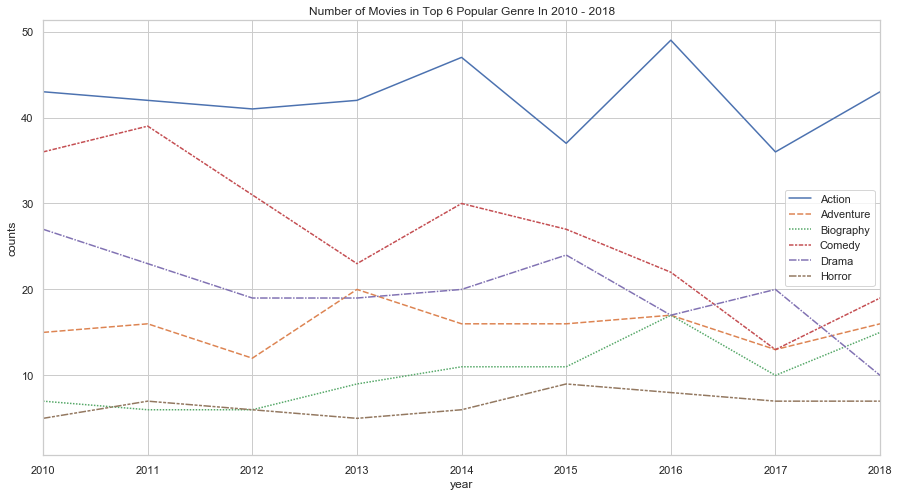

In [538]:
dat = df[df.primary_genre.apply(lambda x: x in top6)]
dat = dat.groupby('primary_genre').year.value_counts()
dat = dat.unstack(0)

plt.figure(figsize = (15, 8))
sns.lineplot(data = dat, sort=False)
plt.title("Number of Movies in Top 6 Popular Genre In 2010 - 2018")
plt.ylabel("counts")
plt.xlim([2010, 2018])
plt.xticks(list(range(2010,2019)))
plt.show()

In [539]:
top6_dom = df.groupby("primary_genre").domestic_gross.mean().sort_values(ascending = False).index[0:6]
top6_int = df.groupby("primary_genre").worldwide_gross.mean().sort_values(ascending = False).index[0:6]

In [540]:
print(top6_dom)
print(top6_int)

Index(['Family', 'Animation', 'Mystery', 'Adventure', 'Action', 'Fantasy'], dtype='object', name='primary_genre')
Index(['Family', 'Animation', 'Adventure', 'Action', 'Fantasy', 'Mystery'], dtype='object', name='primary_genre')


## Monthly Trends

### Total Gross based on release month

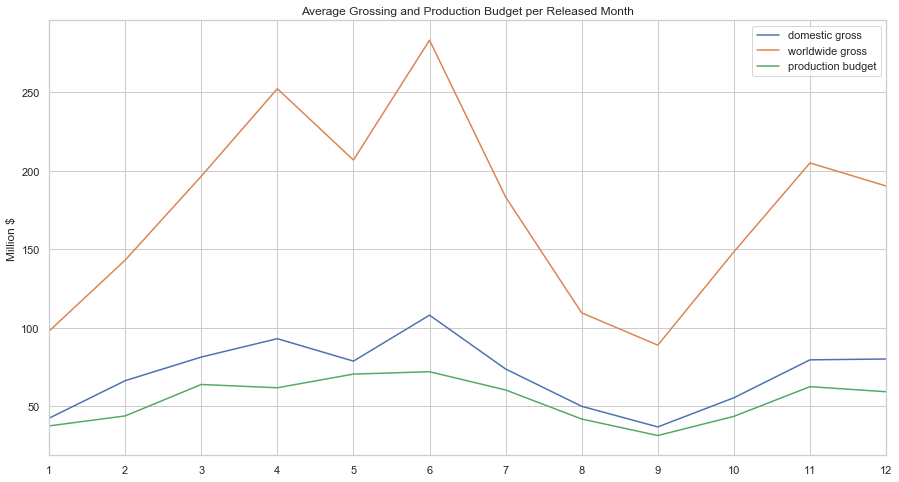

In [541]:
dom_gross = df.groupby('month').domestic_gross.mean()
int_gross = df.groupby('month').worldwide_gross.mean()
prod_bud = df.groupby('month').production_budget.mean()

plt.figure(figsize = (15, 8))
sns.lineplot(data = dom_gross, label = 'domestic gross', sort = False)
sns.lineplot(data = int_gross, label = 'worldwide gross', sort = False)
sns.lineplot(data = prod_bud, label = 'production budget', sort = False)

plt.ylabel("Million $")
plt.title("Average Grossing and Production Budget per Released Month")
plt.xlim([1, 12])
plt.legend()
plt.xticks(list(range(1,13)))
plt.show()

## Rating - Revenue
Rating is important measure beyond revenue that will help establishing the new studio brand. 
Before diving in, let's see if there is any relationship between rating and return.


<Figure size 1080x864 with 0 Axes>

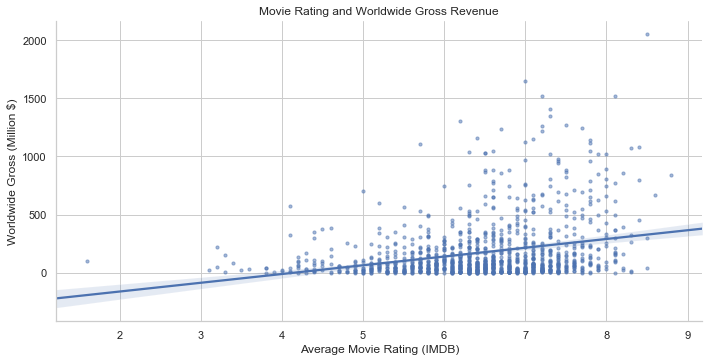

In [542]:
tmp = df[['avg_rating_imdb', 'production_budget', 'domestic_gross', 'worldwide_gross']]

plt.figure(figsize = (15, 12))
ax1 = sns.lmplot(x = "avg_rating_imdb", y = "worldwide_gross", data = tmp, scatter_kws = {"s": 10, "alpha": 0.5}, aspect = 2)

ax1.set(title = "Movie Rating and Worldwide Gross Revenue", xlabel = "Average Movie Rating (IMDB)", ylabel = "Worldwide Gross (Million $)")

plt.show()

# There isn't too strong relationship here

In [543]:
tmp.corr()

,avg_rating_imdb,production_budget,domestic_gross,worldwide_gross
avg_rating_imdb,1.000000,0.171342,0.302544,0.286737
production_budget,0.171342,1.000000,0.682525,0.766970
domestic_gross,0.302544,0.682525,1.000000,0.940869
worldwide_gross,0.286737,0.766970,0.940869,1.000000


## Popularity and Success
Does popularity score correlate with gross revenue?

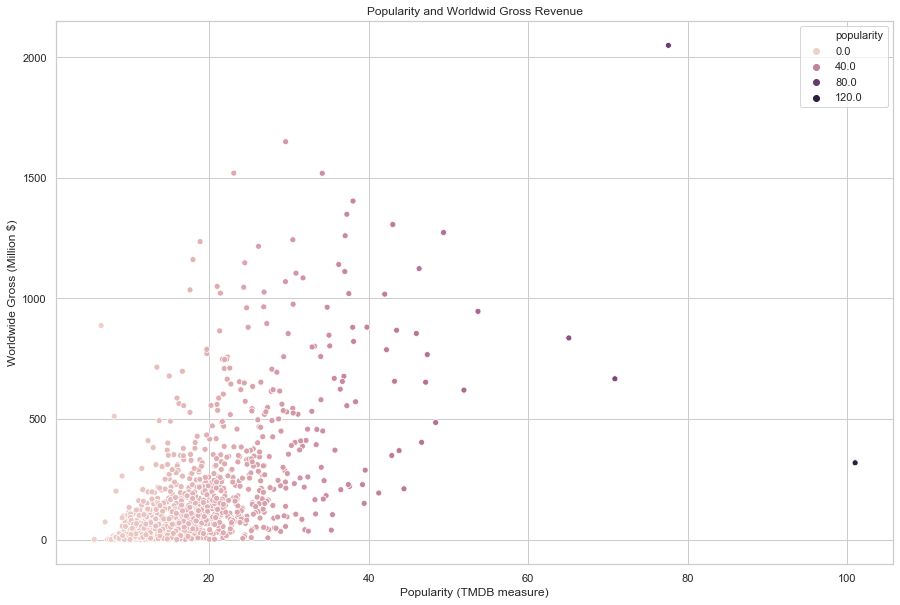

In [544]:
tmp = df[['popularity', 'production_budget', 'domestic_gross', 'worldwide_gross']]

plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "popularity", y = "worldwide_gross", hue = 'popularity', \
                      data = tmp)

ax1.set_xlabel("Popularity (TMDB measure)")
ax1.set_ylabel("Worldwide Gross (Million $)")
ax1.set_title("Popularity and Worldwid Gross Revenue")
plt.show()

# It seems like popularity does relate to the gross revenue. 

In [545]:
tmp.corr()

,popularity,production_budget,domestic_gross,worldwide_gross
popularity,1.000000,0.553836,0.580197,0.617359
production_budget,0.553836,1.000000,0.682525,0.766970
domestic_gross,0.580197,0.682525,1.000000,0.940869
worldwide_gross,0.617359,0.766970,0.940869,1.000000


## MPAA and Revenue
### Worldwide

In [546]:
# Selecting only necessary data
dat = df[df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['primary_genre', 'MPAA', 'worldwide_gross', 'month', 'year']]
dat2 = dat.groupby(['primary_genre', 'MPAA'])['worldwide_gross'].mean()
dat2 = dat2.reset_index()

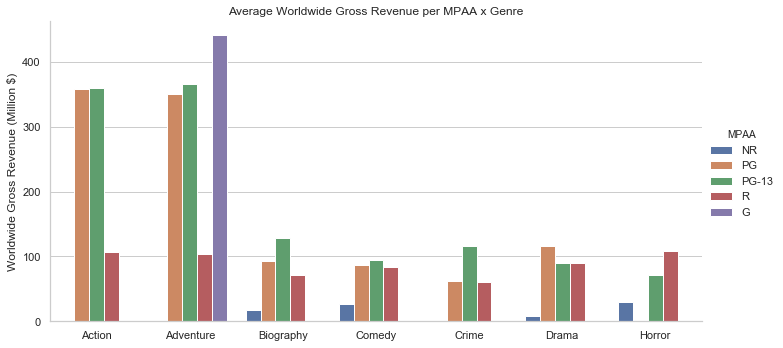

In [547]:
g = sns.catplot(x="primary_genre", y="worldwide_gross", hue="MPAA", data=dat2, kind="bar", aspect = 2)
g.set(title = "Average Worldwide Gross Revenue per MPAA x Genre", xlabel = "", ylabel = "Worldwide Gross Revenue (Million $)")
plt.show()


In [549]:
# Selecting only necessary data
dat = df[df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['primary_genre', 'MPAA', 'domestic_gross', 'month', 'year']]
dat2 = dat.groupby(['primary_genre', 'MPAA'])['domestic_gross'].mean()
dat2 = dat2.reset_index()

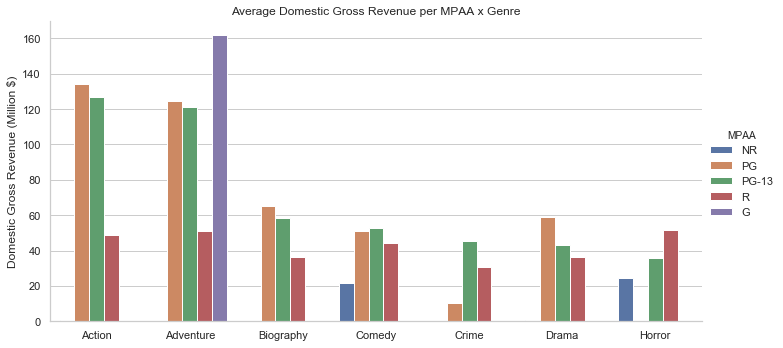

In [550]:
g = sns.catplot(x="primary_genre", y="domestic_gross", hue="MPAA", data=dat2, kind="bar", aspect = 2)
g.set(title = "Average Domestic Gross Revenue per MPAA x Genre", xlabel = "", ylabel = "Domestic Gross Revenue (Million $)")
plt.show()


### MPAA and IMDB Rating
Rated-R movies seems to have pretty consistent revenue across genres.  
It's not the best option for generating revenues. But how about for the brand marketing?  
How do MPAA ratings interact with the IMDB ratings?

In [551]:
# Selecting only necessary data
dat = df[df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['avg_rating_imdb', 'MPAA']]
dat

,avg_rating_imdb,MPAA
0,6.5,R
1,6.9,PG-13
2,6.6,PG-13
3,7.0,PG-13
5,5.8,R
...,...,...
3421,5.9,NaN
3428,5.5,PG-13
3447,7.2,NaN
3459,6.5,R


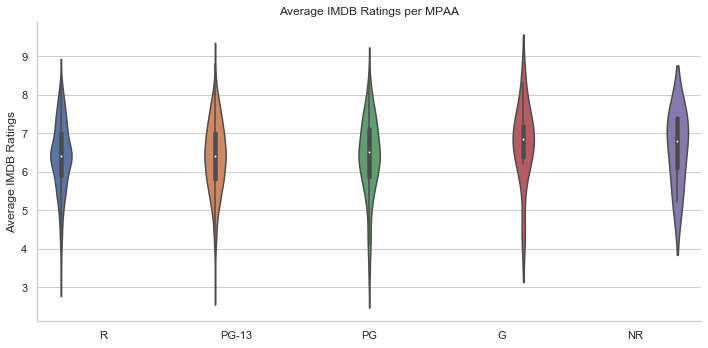

In [552]:
g = sns.catplot(x="MPAA", y="avg_rating_imdb", hue="MPAA", data=dat, kind = 'violin', aspect = 2)
g.set(title = "Average IMDB Ratings per MPAA", xlabel = "", ylabel = "Average IMDB Ratings")
plt.show()


Does not seem to have any significant difference. Rated-G generally has higher ratings. 

### Runtime and Revenue
Any relationship between runtime and revenue?  
How about for each genre?

<Figure size 1080x1080 with 0 Axes>

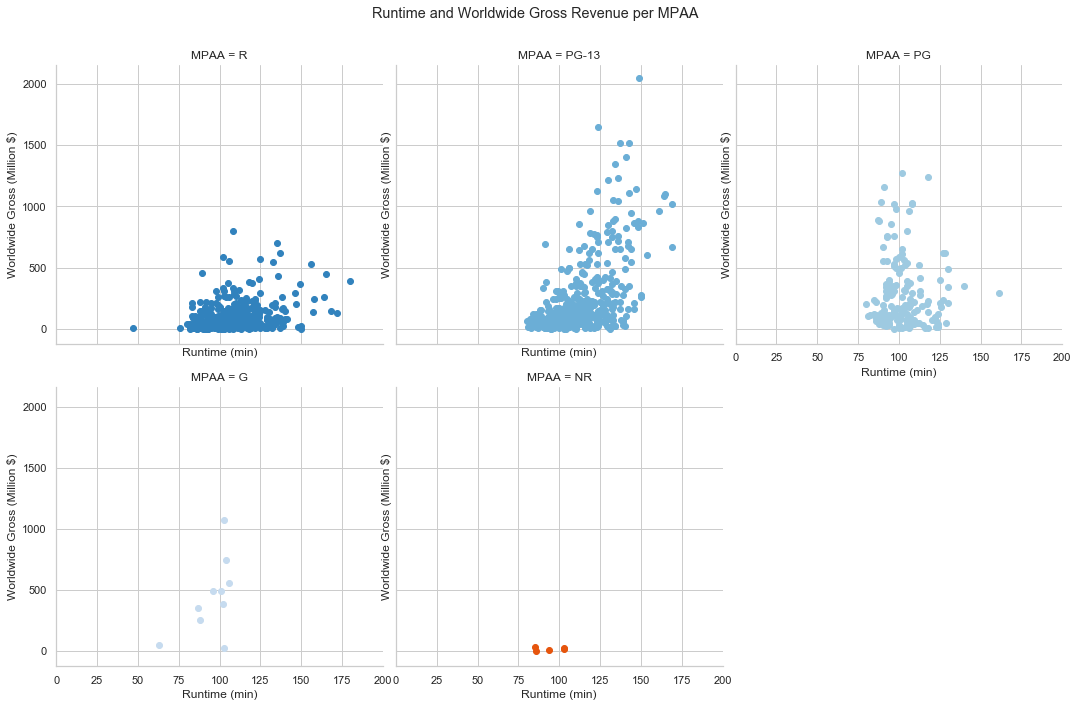

In [553]:
# Selecting only necessary data
dat = df[df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['MPAA', 'worldwide_gross', 'runtime_minutes']]

fig = plt.figure(figsize = (15, 15))

g = sns.FacetGrid(dat, col="MPAA", hue="MPAA", palette="tab20c", col_wrap=3, height=5)
g = g.map(plt.scatter, "runtime_minutes", "worldwide_gross")

g.set(xlim=(0, 200), xlabel = "Runtime (min)", ylabel = "Worldwide Gross (Million $)")
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Runtime and Worldwide Gross Revenue per MPAA')
plt.show()

# 